<a href="https://colab.research.google.com/github/hritic/Machine-learning/blob/main/191CS150_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create Neural Network with 3 Fully connected layers


In [ ]:
import torch 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
import torch.nn as nn

Define the neural network module or class using the Relu activation function:

In [ ]:
# Build the model with Relu function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H_in, H_out, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H_in)
        self.linear2 = nn.Linear(H_in, H_out)
        self.linear3 = nn.Linear(H_out, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = self.linear2(x)
        x = self.linear3(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss for each iteration and accuracy on the validation data.

In [ ]:
# Using the following line code to install the torchvision library
# !conda install -y torchvision


import torchvision.transforms as transforms
import torchvision.datasets as dsets


In [ ]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

Load the training dataset by setting the parameters train to True and convert it to a tensor by placing a transform object in the argument transform.

In [ ]:
# Create the training dataset

train_dataset = dsets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Load the testing dataset by setting the parameter train to False and convert it to a tensor by placing a transform object in the argument transform.


In [ ]:
# Create the validation  dataset

validation_dataset = dsets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function: 

In [ ]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object:

In [ ]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

Define the Neural Network, Criterion Function, Optimizer, and Train the Model

Create the model with 100 hidden neurons at both layers: 

In [ ]:
# Create the model object

input_dim = 28 * 28
hidden_dim_in = 100
hidden_dim_out = 100
output_dim = 10

model = NetRelu(input_dim, hidden_dim_in, hidden_dim_out, output_dim)

Train the network by using the Relu activations function:

In [ ]:
# Train a model with Relu function
learning_rate = 0.1
modelRelu = NetRelu(input_dim, hidden_dim_in, hidden_dim_out, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu,criterion, train_loader, validation_loader, optimizer, epochs=30)

# Analyze Results

Compare the training loss for each activation: 

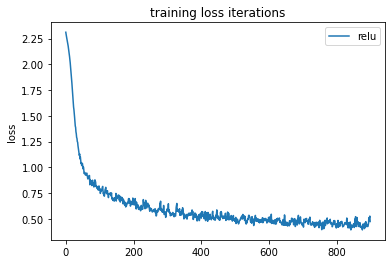

In [ ]:
# Compare the training loss

plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

Compare the validation loss for each model: 

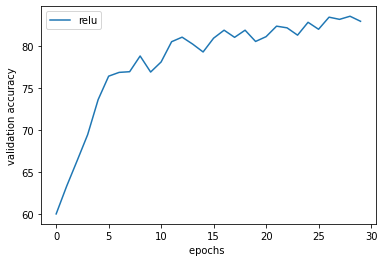

In [ ]:
# Compare the validation loss

plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()